In [16]:
pip install h5py

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [18]:
f = h5py.File('FIREFly_transmission_spectrum_R_pixel_order_1.h5', 'r') # replace with your file path here 
f

<HDF5 file "FIREFly_transmission_spectrum_R_pixel_order_1.h5" (mode r)>

In [19]:
list(f.keys())   # this shows the column names

['header',
 'transit_depth_err_order_1',
 'transit_depth_order_1',
 'wavelength_err_order_1',
 'wavelength_order_1']

In [20]:
# access the items of the dataset calling by their column name

y = f['transit_depth_order_1'][:]
y_err = f['transit_depth_err_order_1'][:]
x = f['wavelength_order_1'][:]
x_err = f['wavelength_err_order_1'][:]

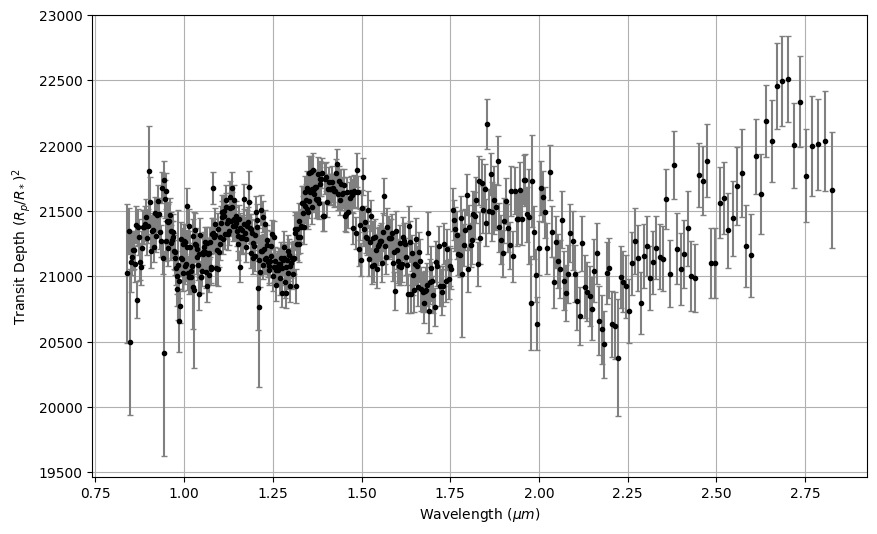

In [21]:
#visualization

plt.figure(figsize=(10,6))
plt.errorbar(x, y, yerr=y_err, fmt='o', color= 'black', ecolor='gray', capsize=2, markersize=3)
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Transit Depth $(R_p/R_*)^2$')
plt.grid(True)
plt.show()

In [22]:
# converting to text file

data = np.column_stack((x, x_err, y, y_err))  # insert only the data that you have

# rename the text file before running the cell
#also set the appropriate column names and sequence

np.savetxt('FIREFly_transmission_spectrum_R_pixel_order_1.txt', data, 
           header='wavelength wavelength_err transit_depth transit_depth_err',
           fmt='%.6e', delimiter='\t')

In [23]:
# how does the text file looks? 
# output -> 

""" 

# wavelength wavelength_err transit_depth transit_depth_err
2.770424e+00	1.304093e-01	2.210203e+04	2.870724e+02
2.651869e+00	1.067011e-01	2.199702e+04	2.490435e+02
2.553384e+00	9.026970e-02	2.170398e+04	2.327986e+02
2.468754e+00	7.898953e-02	2.167092e+04	2.058999e+02
2.394858e+00	6.880193e-02	2.157687e+04	2.085517e+02
2.329621e+00	6.167152e-02	2.131524e+04	1.902052e+02
2.270995e+00	5.558123e-02	2.119631e+04	1.967484e+02
2.218440e+00	4.952812e-02	2.091527e+04	2.112293e+02 

""" 

' \n\n# wavelength wavelength_err transit_depth transit_depth_err\n2.770424e+00\t1.304093e-01\t2.210203e+04\t2.870724e+02\n2.651869e+00\t1.067011e-01\t2.199702e+04\t2.490435e+02\n2.553384e+00\t9.026970e-02\t2.170398e+04\t2.327986e+02\n2.468754e+00\t7.898953e-02\t2.167092e+04\t2.058999e+02\n2.394858e+00\t6.880193e-02\t2.157687e+04\t2.085517e+02\n2.329621e+00\t6.167152e-02\t2.131524e+04\t1.902052e+02\n2.270995e+00\t5.558123e-02\t2.119631e+04\t1.967484e+02\n2.218440e+00\t4.952812e-02\t2.091527e+04\t2.112293e+02 \n\n'